In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('accidents_cleanV2.csv')
df.columns

Index(['x', 'y', 'objectid', 'radicado', 'fecha', 'hora', 'dia', 'periodo',
       'clase', 'direccion', 'direccion_enc', 'cbml', 'tipo_geocod',
       'gravedad', 'barrio', 'comuna', 'diseno', 'dia_nombre', 'mes',
       'mes_nombre', 'x_magnamed', 'y_magnamed', 'longitud', 'latitud', 'file',
       'shape', 'fecha_incidente', 'hora_incidente'],
      dtype='object')

In [50]:
#df['FECHA'] = pd.DatetimeIndex(df['fecha'])


#f['HOUR'] = df['FECHA'].dt.hour
df['hora_incidente'].describe()


count    240240.000000
mean         13.704987
std           6.842401
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: hora_incidente, dtype: float64

### 1.	How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?

In [6]:
%%time
# Month and Year columns
df['Year'] = df['fecha'].apply(lambda x: int(x.split('/')[0]))
df['Month'] = df['fecha'].apply(lambda x: int(x.split('/')[1]))
#Unique values
months = sorted(list(set(df['Month'])))
years = sorted(list(set(df['Year'])))
#Dictionary with number of accidents for each year-month combination
YearMonthCount = {y:{m:len(df[(df['Month']==m) & (df['Year']==y)]) for m in months} for y in years}
# posibles duplicados - ver columna radicado

Wall time: 464 ms


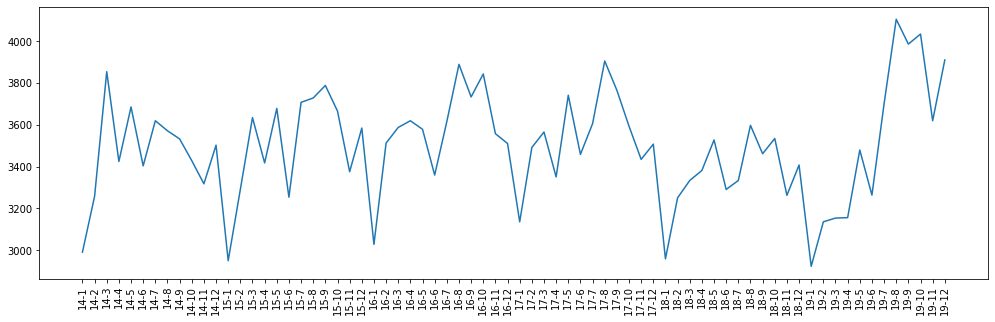

Wall time: 443 ms


In [7]:
%%time
# Plot of the number of accidents over time (monthly)
Numbers2Plot = [YearMonthCount[y][m] for y in years for m in months if YearMonthCount[y][m]]
Labels = [str(y)[-2:]+'-'+str(m) for y in years for m in months if YearMonthCount[y][m]]
MonthlyCount=plt.figure(figsize=(17,5))
ax = MonthlyCount.add_subplot(111)
ax.plot(Labels, Numbers2Plot)
plt.xticks(rotation=90)
plt.show()

Wall time: 728 ms


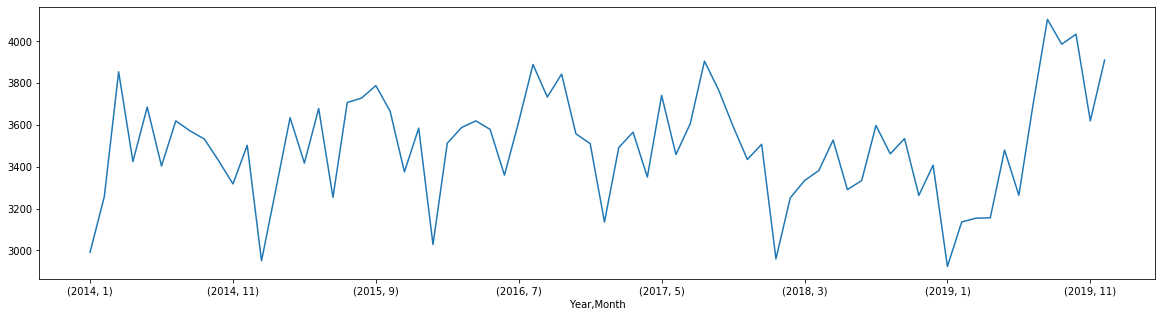

In [18]:
%%time
#print(df.shape)
df['Month'] = pd.DatetimeIndex(df['fecha']).month
df['Year'] = pd.DatetimeIndex(df['fecha']).year
#grouped_df = df.groupby(['Year','Month']).count()['radicado']
#print(grouped_df.head(20))
fig, ax = plt.subplots(figsize=(20,5))
df.groupby(['Year', 'Month']).count()['radicado'].plot(ax=ax)

### 2.	For any particular day, during which hours are accidents most likely to occur?

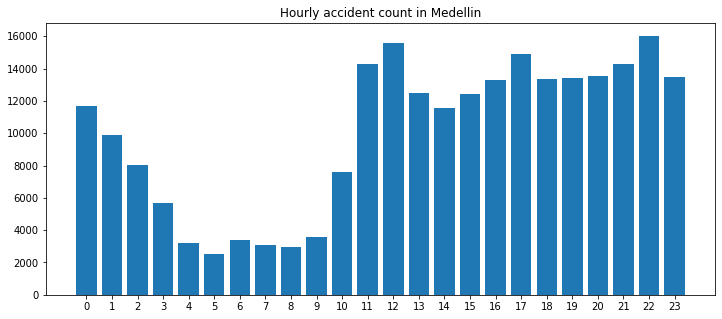

Wall time: 190 ms


array([16022, 15557, 14914, 14305, 14273, 13567, 13487, 13403, 13369,
       13300, 12508, 12420, 11705, 11583,  9864,  8035,  7575,  5654,
        3568,  3401,  3185,  3113,  2937,  2495], dtype=int64)

In [52]:
%%time
x=df['hora_incidente'].value_counts(dropna=True)
HourlyCount=plt.figure(figsize=(12,5))
ax = HourlyCount.add_subplot(111)
plt.bar(x.index, x.values)
plt.xticks(x.index)
plt.title("Hourly accident count in Medellin")
plt.show()
x.values

,radicado
hora_incidente,
0.0,11705
1.0,9864
2.0,8035
3.0,5654
4.0,3185
5.0,2495
6.0,3401
7.0,3113
8.0,2937


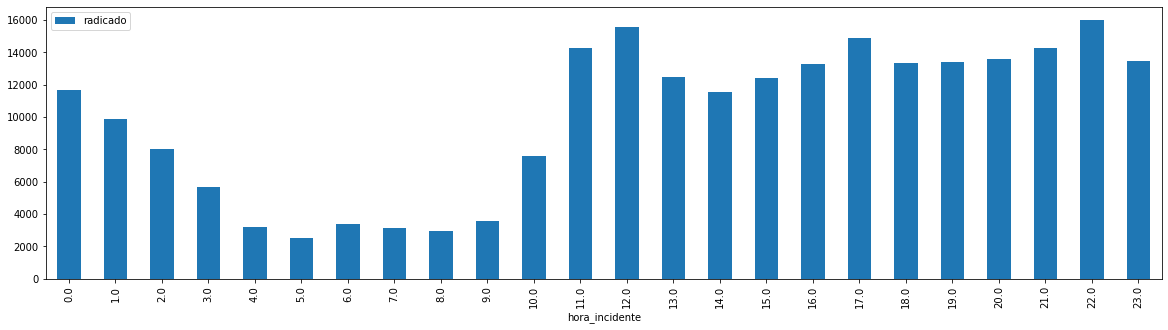

In [53]:
fig, ax = plt.subplots(figsize=(20,5))
df.groupby('hora_incidente').count()[['radicado']].plot.bar(ax=ax)
df.groupby('hora_incidente').count()[['radicado']]

In [59]:
df['hora_incidente'].describe()

count    240240.000000
mean         13.704987
std           6.842401
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: hora_incidente, dtype: float64

### 3.	Are there more accidents on weekdays than weekends? 

In [60]:
# Los nombres de los días son strings con 9 caracteres
df['dia_nombre']=df['dia_nombre'].apply(lambda x: x.replace(' ', ''))

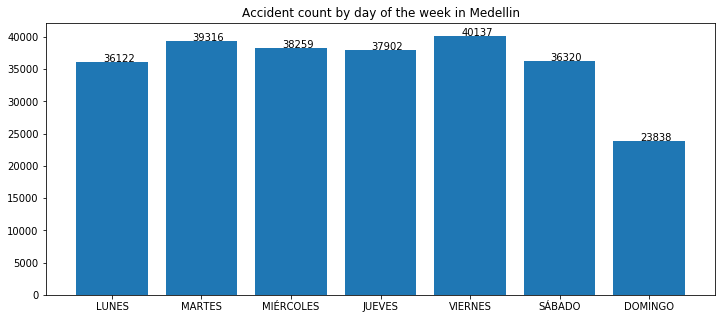

Wall time: 180 ms


In [65]:
%%time
x=df['dia_nombre'].value_counts()
OrderedDays = ['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']
AccidentCount = [x[i] for i in OrderedDays]
DayOfWeekCount=plt.figure(figsize=(12,5))
ax = DayOfWeekCount.add_subplot(111)
plt.bar(OrderedDays, AccidentCount)
plt.xticks(x.index)
plt.title("Accident count by day of the week in Medellin")
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+30, i.get_height())
plt.show()

,radicado
WEEKDAY,
0,36122
1,39316
2,38259
3,37902
4,40137
5,36320
6,23838


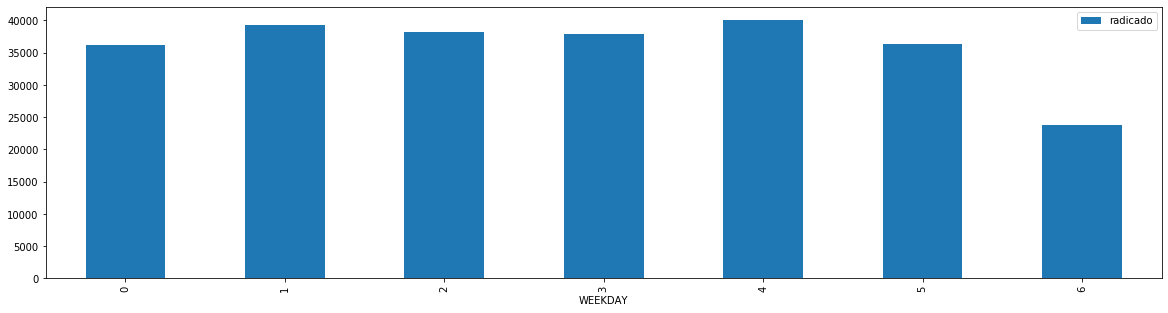

In [74]:
df['FECHA'] = pd.to_datetime(df['fecha'])
df['WEEKDAYNAME'] = df['FECHA'].dt.day_name()
df['WEEKDAY'] = df['FECHA'].dt.weekday
fig, ax = plt.subplots(figsize=(20,5))
df.groupby('WEEKDAY').count()[['radicado']].plot.bar(ax=ax)
df.groupby('WEEKDAY').count()[['radicado']]